In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [39]:
from models.RPS import readable_to_df_list
from utils.measures import calculate_noise_stability

In [79]:
sdf = pd.read_csv('../exp/RPS/RPS_sp500_2021-Sep-21-11-13-13/stability_matrix.csv')

In [80]:
sdf.max().max()

0.6548672566371682

<AxesSubplot:>

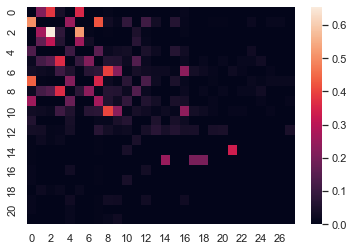

In [83]:
sns.heatmap(sdf, vmin=0)

In [51]:
pre_df = pd.read_csv('../exp/RPS/RPS_sp500_2021-Sep-19-11-41-05/results.csv').drop(columns=['Unnamed: 0'])
pre_df = readable_to_df_list(pre_df, columns=['stocks'])

In [69]:
df = pd.read_csv('../exp/RPS/RPS_sp500_2021-Sep-21-10-47-40/results.csv').drop(columns=['Unnamed: 0'])
df = readable_to_df_list(df, columns=['stocks'])

In [70]:
len(set(df.loc[1, 'stocks']).intersection(set(pre_df.loc[2, 'stocks'])))

74

In [71]:
len(set(df.loc[1, 'stocks']).union(set(pre_df.loc[2, 'stocks'])))

113

In [72]:
calculate_noise_stability(set(df.loc[1, 'stocks']), set(pre_df.loc[2, 'stocks']))

0.6548672566371682

In [73]:
stability_df = pd.DataFrame(index=list(range(len(df))), columns=list(range(len(pre_df))))

for i in range(len(df)):
    for j in range(len(pre_df)):
        distance = calculate_noise_stability(
            set(df.loc[i, 'stocks']),
            set(pre_df.loc[j, 'stocks'])
        )
        stability_df.loc[i, j] = distance

In [74]:
stability_df.max()

0     0.504854
1     0.266667
2     0.654867
3     0.360825
4      0.24581
5     0.520408
6     0.230769
7     0.421569
8     0.401869
9     0.226804
10     0.08642
11    0.139241
12    0.125926
13    0.071429
14        0.25
15     0.06383
16    0.234043
17         0.2
18         0.2
19    0.043478
20    0.045455
21    0.333333
22    0.014085
23    0.025641
24    0.028169
25     0.01626
26    0.016393
27    0.045455
dtype: object

In [75]:
stability_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.056604,0.0,0.0,0.0,0.038462,0.0,0.0,0.013699,0.013158,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.004115,0.266667,0.654867,0.07971,0.0,0.520408,0.008929,0.0,0.006579,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.256684,0.0,0.0,0.0,0.174603,0.0,0.0,0.264706,0.058824,0.027273,...,0.0,0.0125,0.0,0.0,0.0,0.0,0.0125,0.0,0.0,0.012658
3,0.0,0.021277,0.009901,0.015873,0.0,0.015873,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.012658,0.0,0.0,0.0,0.028169,0.0,0.0,0.007194,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.213333,0.380952,0.038835,0.0,0.35443,0.0,0.0,0.009091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.006289,0.020833,0.009804,0.015625,0.0,0.0,0.0,0.007194,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0125,0.0,0.0,0.0,0.027397,0.0,0.0,0.007092,0.028986,0.025641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.006329,0.0,0.0,0.0,0.0,0.0,0.0,0.007246,0.0,0.0,...,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
9,0.438144,0.005988,0.004525,0.0,0.21519,0.0,0.0,0.348958,0.021739,0.00641,...,0.0,0.008065,0.0,0.0,0.0,0.016129,0.008065,0.01626,0.016393,0.016393


In [76]:
df = df.sort_values('sharpe').reset_index(drop=True)
            
pre_df = pre_df.sort_values('sharpe').reset_index(drop=True)

stability_df = pd.DataFrame(index=list(range(len(df))), columns=list(range(len(pre_df))))

for i in range(len(df)):
    for j in range(len(pre_df)):
        distance = calculate_noise_stability(
            set(df.loc[i, 'stocks']),
            set(pre_df.loc[j, 'stocks'])
        )
        stability_df.loc[i, j] = distance

In [78]:
stability_df.max().max()

0.6548672566371682